In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
df = pd.DataFrame({
  'sqft': [850, 920, 980, 1050, 1100, 1150, 1200, 1250, 1300, 1350,
           1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850,
           1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350],
  'price': [142000, 155000, 165000, 178000, 185000, 192000, 200000, 208000, 215000, 223000,
            230000, 238000, 245000, 253000, 260000, 268000, 275000, 283000, 290000, 298000,
            305000, 313000, 320000, 328000, 335000, 343000, 350000, 358000, 365000, 373000]
}
)

In [26]:
X = np.array(df.sqft).reshape(-1,1)
y = np.array(df.price).reshape(-1, 1)

#Predict with sklearn

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

#Predict with Linear regression from scratch

In [30]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  total_cost = 0
  for i in range(m):
    total_cost = total_cost + ((np.dot(w, x[i])+b)-y[i])**2
  total_cost = total_cost / (2*m)
  return total_cost
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    dj_dw = dj_dw + ((np.dot(w, x[i])+b)-y[i])*x[i]
    dj_db = dj_db + ((np.dot(w, x[i])+b)-y[i])
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  return dj_dw, dj_db
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
  J_history = []
  w_history = []
  w = w_in
  b = b_in
  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w, b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    if i<10000:
      cost = cost_function(x, y, w, b)
      J_history.append(cost)
    if i%math.ceil(num_iters/10)==0:
      w_history.append(w)
      print(f"Iteration {i}: Cost {float(J_history[-1]):.2f}")
  return w, b

In [31]:
split_index = math.ceil(0.3*X.shape[0])

X_strain = df.sqft[:-split_index]
X_stest = df.sqft[-split_index:]

y_strain = df.price[:-split_index]
y_stest = df.price[-split_index:]

In [32]:
m = X_test.shape[0]
initial_w = 0
initial_b = 0
num_iters = 1500
alpha = 0.0000006
w, b = gradient_descent(X_strain, y_strain, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters)
y_spred = np.zeros(m)
for i in range(m):
  y_spred[i] = np.dot(w, X_test[i])+b
print(f"w: {w}, b: {b}")

Iteration 0: Cost 1399368906.00
Iteration 150: Cost 6445333.57
Iteration 300: Cost 6445284.32
Iteration 450: Cost 6445235.08
Iteration 600: Cost 6445185.84
Iteration 750: Cost 6445136.59
Iteration 900: Cost 6445087.35
Iteration 1050: Cost 6445038.11
Iteration 1200: Cost 6444988.87
Iteration 1350: Cost 6444939.63
w: 163.56486748984935, b: 0.7774243126550197


/tmp/ipython-input-1016788454.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_spred[i] = np.dot(w, X_test[i])+b


In [33]:
t = pd.DataFrame({'Actual': np.ravel(y_test), 'Sklearn': np.ravel(y_pred), 'Scratch': np.ravel(y_spred)})
t

,Actual,Sklearn,Scratch
0,358000,358465.776481,368021.729276
1,268000,267363.501487,269882.808783
2,328000,328098.351483,335308.755779
3,283000,282547.213986,286239.295532
4,215000,214220.507740,212635.105161
5,223000,221812.363990,220813.348536
6,365000,366057.632731,376199.972651
7,335000,335690.207733,343486.999153
8,245000,244587.932739,245348.078659


Text(0, 0.5, 'Price')

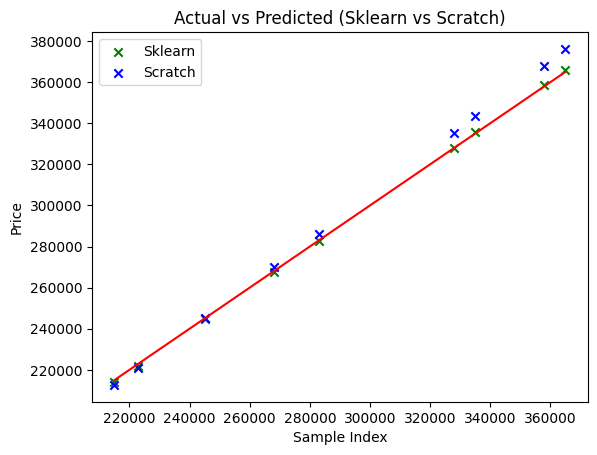

In [34]:
plt.scatter(y_test, y_pred, marker='x', c='g', label='Sklearn')
plt.scatter(y_test, y_spred, marker='x', c='b', label='Scratch')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.legend()
plt.title("Actual vs Predicted (Sklearn vs Scratch)")
plt.xlabel("Sample Index")
plt.ylabel("Price")

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

In [38]:
print('Slope :', model.coef_)
print('intercept :', model.intercept_)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('r2 score :', r2_score(y_test, y_pred))

Slope : [[151.83712499]]
intercept : [16832.24525269]
MAE : 642.2720540480934
r2 score : 0.9998248740912904


In [40]:
print('Slope :', w)
print('intercept :', b)
print('MAE :', mean_absolute_error(y_test, y_spred))
print('r2 score :', r2_score(y_test, y_spred))

Slope : 163.56486748984935
intercept : 0.7774243126550197
MAE : 5226.576237268183
r2 score : 0.9857516801507348
